# X-ray_image_based_Pneumonia_predictor

## Importing required libraries and modules

In [1]:
'''we use convolutional neural network to make the model learn certain features from the X-ray images
instead of learning images as in normal feed forward network ,we will feed in features of the image to the feed forward network'''

#library imports
'''we will use keras ,with tensorflow-gpu 2.0 backend'''
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from matplotlib import pyplot as plt
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

#mentioning the test and train directory
'''the dataset consists of two class normal and pnuemonia,
so basically this turns out into binary classification model'''

train_data_dir = "C:\\Users\\admin\\Downloads\\Project\\Train3"
test_data_dir = "C:\\Users\\admin\\Downloads\\Project\\Test3"

'''learning feature isnt a small task ,hence we need to provide our model with many training images,
the fact is that,when we flip an image or give sheer,we obtain a new image but the image still retains the fetaure.
We use this concept to increase our training dataset,and simulatniously normalise it by dividing each pixel with 255'''

train_datagenerator = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagenerator = ImageDataGenerator(rescale=1. / 255)

training_set = train_datagenerator.flow_from_directory(
    train_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

testing_set = test_datagenerator.flow_from_directory(
    test_data_dir,
    target_size=(64, 64),
    batch_size=256,
    class_mode='binary')



Using TensorFlow backend.


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Preparing the model

In [2]:
'''we define our convolutional neural network model,
we use three convolutional layer each with relu activation two deal with negative outputs and each followed ny a maxpooling layer'''

model =Sequential()
model.add(Convolution2D(64,3,3, input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
          

model.add(Convolution2D(64,3,3, input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64,3,3, input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
          
'''the output is flattened to and fed into a feed forward neural network with 128 units and relu activation followed by output
layer with one unit with sigmoid activation to squish the value between 0 to 1,for binary classfification'''
model.add(Flatten())
model.add(Dense(output_dim=128,activation='relu'))
model.add(Dense(output_dim=1,activation='sigmoid'))


''' the model is finally compiled and used to adam optimiser for back propogation to minimise the 
binary cross entropy loss and measuring our accuracy'''

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])





C:\Users\admin\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """
C:\Users\admin\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  if __name__ == '__main__':
C:\Users\admin\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  if sys.path[0] == '':
C:\Users\admin\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
C:\Users\admin\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your

## Training the model

In [3]:
#training for 10 epochs
history=model.fit_generator(training_set,
    steps_per_epoch = 100,
    epochs = 10, validation_data = testing_set,
    validation_steps = 50)

Epoch 1/10
100/100 [==============================] - 192s 2s/step - loss: 0.4369 - accuracy: 0.8091 - val_loss: 0.4263 - val_accuracy: 0.8140
Epoch 2/10
100/100 [==============================] - 198s 2s/step - loss: 0.2627 - accuracy: 0.8950 - val_loss: 0.3876 - val_accuracy: 0.8419
Epoch 3/10
100/100 [==============================] - 208s 2s/step - loss: 0.2421 - accuracy: 0.8975 - val_loss: 0.3305 - val_accuracy: 0.8428
Epoch 4/10
100/100 [==============================] - 210s 2s/step - loss: 0.2170 - accuracy: 0.9162 - val_loss: 0.2862 - val_accuracy: 0.8748
Epoch 5/10
100/100 [==============================] - 212s 2s/step - loss: 0.1878 - accuracy: 0.9259 - val_loss: 0.2411 - val_accuracy: 0.8915
Epoch 6/10
100/100 [==============================] - 208s 2s/step - loss: 0.1953 - accuracy: 0.9237 - val_loss: 0.4119 - val_accuracy: 0.8172
Epoch 7/10
100/100 [==============================] - 209s 2s/step - loss: 0.1665 - accuracy: 0.9334 - val_loss: 0.6033 - val_accuracy: 0.7147

## Saving the model and plotting the data for model_accuracy and model_loss graph

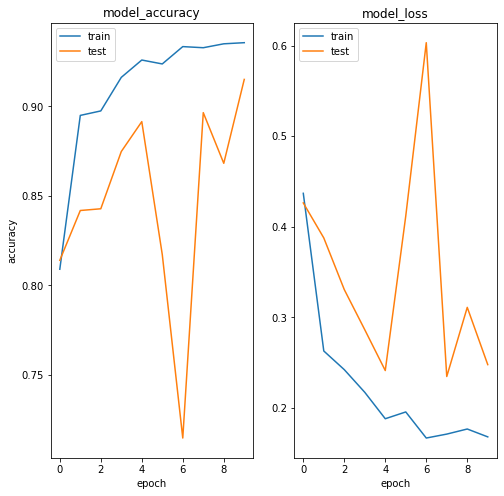

In [4]:
#saving the model and plotting the data
model.save_weights('model_saved.h5')
model.save('model.h5')
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs_range=range(10)
from matplotlib import pyplot as plt
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training accuracy')
plt.plot(epochs_range,val_acc,label='validation Accuracy')
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training_loss')
plt.plot(epochs_range,val_loss,label='Validation loss')
plt.title('model_loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

## Loading the model and prediction of normal report

In [45]:
loaded_model=load_model('model.h5')
p1="C:\\Users\\admin\\Downloads\\Project\\c_m\\NORMAL\\"
from os import listdir
from os.path import isfile, join
onlyfiles1 = [f for f in listdir(p1) if isfile(join(p1, f))]
test1=[0 for i in range(len(onlyfiles1))]
pred1=[]
for i in onlyfiles1:
    p2=p1+i
    test_image=image.load_img(p2,target_size=(64,64))
    test_image=image.img_to_array(test_image)
    test_image=np.expand_dims(test_image,axis=0)
    result=model.predict(test_image)
    training_set.class_indices
    if result[0][0]==0:
        pred1.append(0)
    else:
        pred1.append(1)

    


## Loading the model and prediction of Pneumonic report

In [46]:
loaded_model=load_model('model.h5')
p1="C:\\Users\\admin\\Downloads\\Project\\c_m\\PNEUMONIA\\"
from os import listdir
from os.path import isfile, join
onlyfiles2 = [f for f in listdir(p1) if isfile(join(p1, f))]
test2=[1 for i in range(len(onlyfiles2))]
pred2=[]
for i in onlyfiles2:
    p2=p1+i
    test_image=image.load_img(p2,target_size=(64,64))
    test_image=image.img_to_array(test_image)
    test_image=np.expand_dims(test_image,axis=0)
    result=model.predict(test_image)
    training_set.class_indices
    if result[0][0]==0:
        pred2.append(0)
    else:
        pred2.append(1)

    


In [47]:
test=test1+test2
pred=pred1+pred2



## Confusion_matrix for the given model

In [48]:
from sklearn.metrics import confusion_matrix as cn
# from pandas_ml import ConfusionMatrix as cn
confuse=cn(test,pred)

In [49]:
print(confuse)

[[189  45]
 [ 20 370]]
